In [1]:
import rescomp as rc
import scipy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

In [79]:
# Reservoir ode
t, U = rc.orbit("lorenz", duration=1000)
gamma = 5.0
sigma = 0.14
activ_f = np.tanh
p = 0.01
res = (np.random.rand(100, 100) < p).astype(float)
W_in = np.random.rand(100, 3)
u = CubicSpline(t, U)
res_f = lambda r,t =  gamma * (-1 * r + activ_f(res @ r + sigma * W_in @ u(t)))
r0    = np.random.rand(100)
states = integrate.odeint(res_f, r0, t)
W_out =  U.T @ states @ np.linalg.inv(states.T @ states)
res_pred_f = lambda r,t =  gamma * (-1 * r + activ_f(res @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(res_f, r0_pred, t)
Uhat = W_out @ pred_states.T

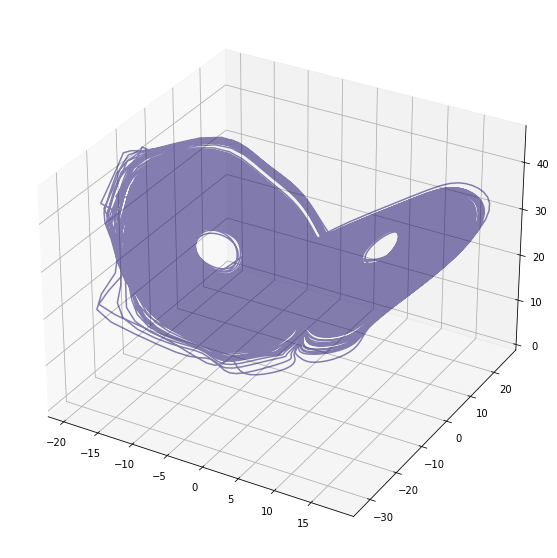

array([0.06391994, 0.02049736, 0.4024138 ])

In [81]:
rc.plot3d(Uhat.T)

In [82]:
def res_f(t, r):
    return gamma * (-1 * r + activ_f(res @ r + sigma * W_in @ u(t)))

sol = integrate.solve_ivp(res_f, (0, 1000), r0,  t_eval=t)
states = sol.y.T
W_out =  U.T @ states @ np.linalg.inv(states.T @ states)
Uhat = W_out @ states.T

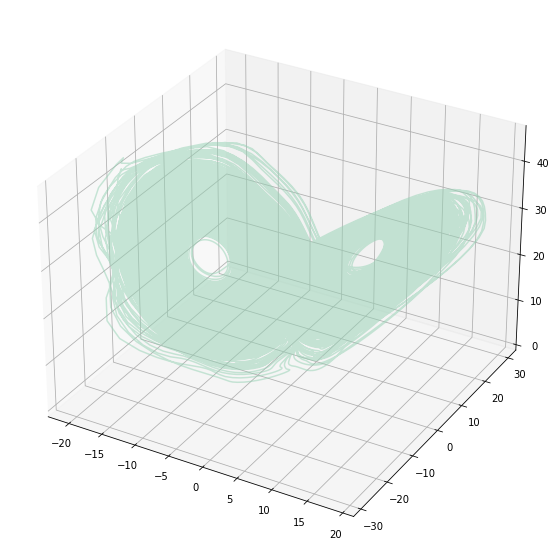

array([0.58016985, 0.82044543, 0.70339866])

In [83]:
rc.plot3d(Uhat.T)

In [84]:
def res_pred_f(r,t):
    """ Reservoir prediction ode. Assumes precomputed W_out """
    return gamma*(-1*r + activ_f(res @ r + sigma * W_in @ (W_out @ r)))

u0 = rc.random_initial("lorenz")
r0 = r0 + np.random.randn(100)*1e-5
states = integrate.odeint(res_pred_f, r0, t)
Uhat = W_out @ states.T

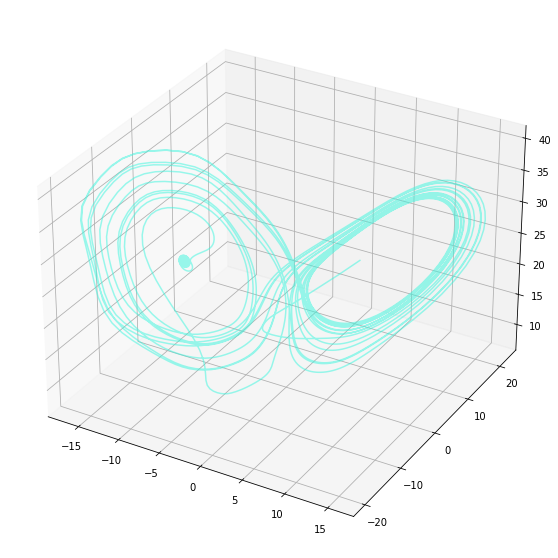

array([0.21466269, 0.96540332, 0.87042839])

In [85]:
rc.plot3d(Uhat[:, :].T)

In [86]:
def res_pred_f(t, r):
    """ Reservoir prediction ode. Assumes precomputed W_out """
    return gamma*(-1*r + activ_f(res @ r + sigma * W_in @ (W_out @ r)))

sol = integrate.solve_ivp(res_pred_f, (0, 1000), r0, t_eval=t, method="LSODA")
states = sol.y.T
Uhat = W_out @ states.T

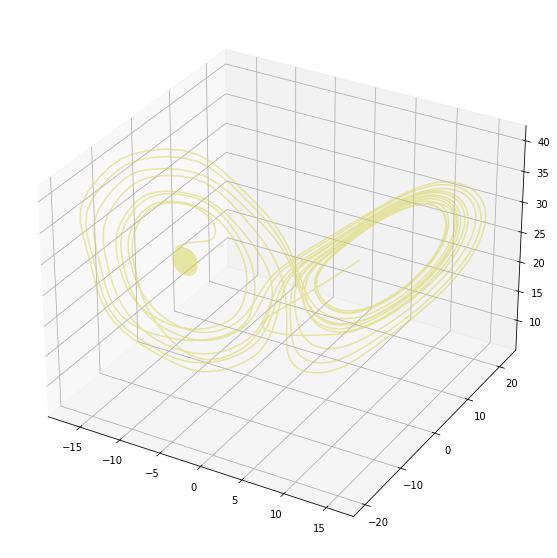

array([0.83779623, 0.829348  , 0.30022077])

In [87]:
rc.plot3d(Uhat[:, :].T)

I'm deciding on odeint because it is faster, simpler and nicer looking in the code.

In [88]:
def res_f(r, t, u):
    return gamma * (-1 * r + activ_f(res @ r + sigma * W_in @ u(t)))

r0    = np.random.rand(100)
u = CubicSpline(t, U)
states = integrate.odeint(res_f, r0, t, args=(u,))
W_out =  U.T @ states @ np.linalg.inv(states.T @ states)
Uhat = W_out @ states.T

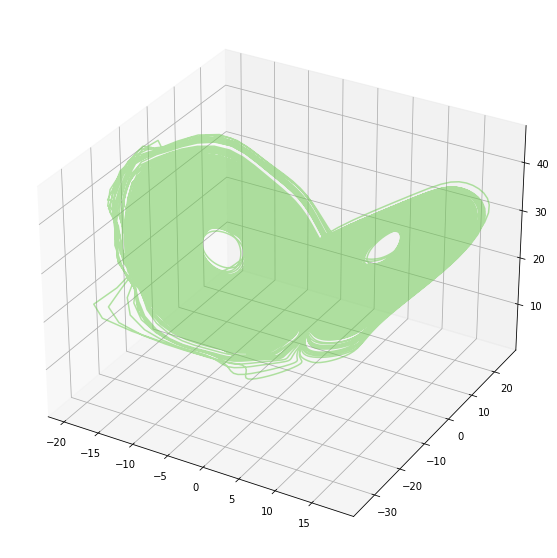

array([0.40639915, 0.79388493, 0.28995675])

In [90]:
rc.plot3d(Uhat.T)

In [57]:
RES = {
    "res_sz": 50,
    "activ_f": np.tanh,
    "mean_degree": 2.0,
    "ridge_alpha": .0001,
    "spect_rad": 0.5,
    "gamma": 5.,
    "sigma": 1.5,
    "uniform_weights": True,
    "sparse_res": True,
    "signal_dim": 2
}


def make_test_data():
    t = np.linspace(0, 20, 1000)
    U =  np.vstack((np.cos(t), -1 * np.sin(t))).T
    return t, U

res = rc.ResComp(**RES)
t, U = make_test_data()
res.train(t, U)
pre = res.predict(t[500:], U[500, :])
error = np.max(np.linalg.norm(pre - U[500:, :], ord=np.inf, axis=0))
error

0.0944432263101288

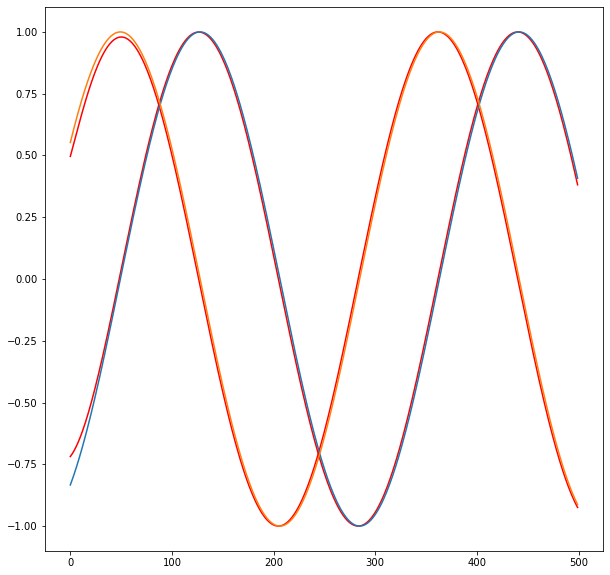

In [34]:
plt.plot(pre, c="r")
plt.plot(U[500:,:])